<center>
<h1> An Overview of the Navie Bayes Classifier </h1>
<h3> Bita Banihashemi </h3>
<h4> Email: first name dot last name at gmail dot com </h4>    
</center>    
    

## Outline


* 1 [Introduction](#1-Intoduction)
* 2 [Theoretical Background](#2-Theoretical-Background)        
     * 2.1 [Probablity Notation](#Probablities)
     * 2.2 [Bayes Theorem](#Bayes-Theorem)
* 3 [Bayes Classifier](#3-Bayes-Classifier)
* 4 [Navie Bayes in Scikit-Learn](#4-Navie-Bayes-in-Scikit-Learn)
     * 4.1 [Gaussian Naive Bayes](#Gaussian-Naive-Bayes)
     * 4.2 [Multinomial Naive Bayes](#Multinomial-Naive-Bayes)
     * 4.3 [Bernoulli Naive Bayes](#Bernoulli-Naive-Bayes)
* 5 [Further Reading ](#5-Further-Reading)
* 6 [References](#6-References)
    
       

# 1 Intoduction

Naive Bayes methods are a set of supervised machine learning algorithms based on applying [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem). Naive Bayes algorithms incorporate the ''naive'' assumption of [conditional independence](https://en.wikipedia.org/wiki/Conditional_independence) between every pair of features given the value of the class variable (target variable). Despite such an oversimplied assumption, naive Bayes classifiers work very well in many complex real-world problems. 

Some popular applications of the navie Bayes include:

+ Email Spam Filtering, to classify emails as Spam or Not Spam

+ Sentiment Analysis, to analyse status updates on social media expressing positive or negative emotions

+ Classifying news articles about Technology, Entertainment, Sports, Politics, etc. 

+ Document Categorization, where a search engine may use document classicfiation to index documents and find relevancy scores, also known as the [PageRank](https://en.wikipedia.org/wiki/PageRank#:~:text=PageRank%20(PR)%20is%20an%20algorithm,of%20the%20founders%20of%20Google). 


<h5>Advantages and Disadvantages</h5>



Navie Bayes classifiers have several advantages:

+ They only require a relatively small number of training data samples to perform classification efficiently, when compared to other algorithms such as decision trees, logistic regression, or support vector machines

+ They have very few (if any) tunable parameters

+ They are extremely fast for both training and prediction. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This makes them often suitable for very high-dimensional datasets, helping to alleviate problems stemming from the curse of dimensionality

+ They are often very easily interpretable

Such advantages mean a naive Bayesian classifier is typically a good choice as an initial baseline classification. If it performs suitably, then one has a very fast, very interpretable classifier for the problem. In case it performs poorly, then one can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers typically  perform especially well in one of the following situations:

+ When the naive assumptions actually match the data, which is generally rare in practice
+ For very well-separated categories, in cases where model complexity is less important
+ For very high-dimensional data, in cases where model complexity is less important        

The last two points are related: with the increase in the dimension of a dataset, it becomes less likely for any two points to be found close together (since they must be close in every single dimension to be considered close overall). This refers to the fact that on average, clusters in high dimensions tend to be more separated, compared with clusters in low dimensions, that is, assuming the new dimensions in fact add information. Due to this reason, simplistic classifiers such as naive Bayes tend to work as well or sometiems better than more complicated classifiers as the dimensionality grows: once enough data is available, even a simple model can be very powerful.

On the flip side, as naive Bayes classifiers make such strong assumptions about data, they will generally not perform as well as a more complicated model. Moreover, although naive Bayes is known as a good classifier, it has its drawbacks as an estimator, hence, the probability outputs from $predict_proba$ may not be accurate. 

# 2 Theoretical Background 

## Probablities

<b>Event</b>: In probability theory, an [event](https://en.wikipedia.org/wiki/Event_(probability_theory)) consists of a set of outcomes of an experiment (a subset of the [sample space](https://en.wikipedia.org/wiki/Sample_space#:~:text=In%20probability%20theory%2C%20the%20sample,or%20results%20of%20that%20experiment.)), to which a probability (between 0 and 1) is assigned. For example, $P(A) = 0.7$ indicates probabality of event $A$ is 0.7.

<b>Random Variable</b>: It is often convenient to express events in relations with [random variables](https://en.wikipedia.org/wiki/Random_variable). A random variable takes the possible values of the outcomes of an experiment. For instance, in a dice-rolling experiment, a random variable $X$ would be such that $X \in \{1, 2, 3, 4, 5, 6\}$. It is possible to write the event of having a number more than 2 as $X > 2$; hence, $X > 2$ represents the event $\{3, 4, 5, 6\}$ 
As per the events with only one outcome, they are ususally written as $X = 2$ or $X = 3$ or $X = x$ and so on. 

<b>Marginal Probability</b>: represents the probability of an event without reference to the values of the other variables. For example, $P(A)$. 

<b>Conditional Probability</b>: Unline the marginal probabality, represents the probabality of an event contingent upon the occurance of other event(s). For example, $P(A given B)$ or $P(A \mid B)$.

<b>Joint probability</b>:is the probability of two (or more) simultaneous events, for instance $P(A and B)$ or $P(A, B)$. 

<h5> Calculating Joint and Conditinal Probabalities </h5>

The joint probability can be calculated using the conditional probability; for example:

$$P(A, B) = P(A \mid B) * P(B)$$

The above is called the product rule. It should be noted that the joint probability is symmetrical, meaning that: $P(A, B) = P(B, A)$.

Similarly, the conditional probability can be calculated using the joint probability; for example:

$$P(A \mid B) = \frac{P(A, B)}{P(B)}$$

The conditional probability is not symmetrical however, and hence, $P(A \mid B) \neq P(B \mid A)$

## Bayes Theorem 

Conditional probability can also be calculated using another conditional probability:

$$P(A \mid B) = \frac{P(B \mid A) * P(A)}{P(B)}$$

The alternative approach of calculating the conditional probability is useful in situations where the joint probability is challenging to calculate (which typically the case), as well as when the reverse conditional probability is available or easy to calculate.

This alternate calculation of the conditional probability is referred to as Bayes' Rule or [Bayes' Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem).  The above simple equation underlies many AI systems for probabalistic inference. 

Bayes' Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes' theorem is stated mathematically as the following equation: where A and B are events and P(B) 

Typically, the result $P(A \mid B)$ is referred to as the $posterior$ probability and $P(A)$ is referred to as the $prior$ probability, meaning the probability of event before the evidence is seen (i.e., occurance of $B$). Sometimes $P(B \mid A)$ is referred to as the $likelihood$ and $P(B)$ is referred to as the $evidence$.   

As a result, Bayes Theorem to be restated as: 

$$Posterior = \frac{Likelihood * Prior}{Evidence}$$


When the denominator $P(B)$ is not directly available, it is possible to calculate it an alternative way. Assume that there are $n$ mutually disjoint events $A_j$ , where $j = 1, 2, \ldots, n$ and their union is the sample space $S$: $\cup^n_{j=1}A_j = S$
Then probability of any event $B \subseteq S$  can be written in the following way:


$$
\begin{array}{l}
P(B) = Pr(B \cap S) \mbox{ since B is completely contained in S} \\
\hspace{2.1em} = P(B \cap (\cup_j A_j))\\
\hspace{2.1em} = P(\cup_j  (B \cap A_j))\\
\hspace{2.1em} = \Sigma_j P(B \cap A_j) \\
\hspace{2.1em} = \Sigma_j P(B \mid A_j)P(A_j) 
\end{array} 
$$

The above result is sometimes called the [law of total probability](https://en.wikipedia.org/wiki/Law_of_total_probability). This provides us with a more general Bayes theorem:

$$P(A_i \mid B) = \frac{P(B \mid A_i)P(A_i)}{\Sigma_j P(B \mid A_j)P(A_j)}$$



In case we have $P(A)$, then we can calculate $P(not A)$ as its complement:

$$ P(not A) = 1 – P(A) $$

Moreover, if we have $P(not B \mid not A)$, then we can calculate $P(B \mid not A)$ as its complement:

$$P(B \mid not A) = 1 – P(not B \mid not A)$$

### Casual Diagnostics

In many cases, we perceive as evidence the $\mathit{effect}$ of some unknown $\mathit{cause}$ and we are interested in determining that cause. In this case, it is possible to view Bayes' rule as:

$$P(cause \mid \mathit{effect}) = \frac{P(\mathit{effect} \mid cause) P(cause)}{P(\mathit{effect})}$$

Note that the conditional probability $P(\mathit{effect} \mid cause)$ quantifies the relationship in the causal directtion, while $P(cause \mid \mathit{effect})$ describes the diagnostic direction. If we are interested in medical diagnosis, we often have access to conditional probabilities on causal relationships (i.e., the doctor knows $P(symptoms \mid disease)$) and want to derive a diagnosis, that is $P(disease \mid symptoms)$. 

Let's look at an example: suppose a doctor knows that the disease meningitis causes the patient to have a stiff neck,
for about 70% of the time. The doctor also knows some unconditional facts, such as the fact that the prior probability
that a patient has meningitis is 1/50,000, and that the prior probability that any patient has a stiff neck is 1%. 

We let $s$ denote the proposition that the patient has a stiff neck and $m$ to represent the proposition that the patient has meningitis, we have:

$$
\begin{array}{l}
P(s \mid m) = 0.7 \\
P(m) = 1/50000 \\
P(s) = 0.01 \\
P(m \mid s) = \frac{P(s \mid m)P(m)}{P(s)} = \frac{0.7 * 1/50000}{0.01}= 0.0014
\end{array} 
$$

It can be concluded that we expect less than 1 in 700 patients with a stiff neck to have meningitis. Note that
although a stiff neck is quite strongly indicated by meningitis (with probability 0.7), the
probability of meningitis in the patient remains small. This is due to the fact that the prior probability of
stiff necks is much higher than that of meningitis.



# 3 Bayes Classifier 

A Naive Bayes classifier is a probabilistic machine learning model which is utilized for classification task. The essential part of the classifier is based on the Bayes theorem.  The fundamental Naive Bayes assumption is that each feature makes an independent and equal contribution to the outcome.


Given target variable $y$ and dependent feature vector $x_1$ through $x_n$, Bayes' theorem states the following relationship: 

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)} {P(x_1, \dots, x_n)}$$

Considering the naive conditional independence assumption:

$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y), \mbox{  for all $i$, }$$,

the above relationship can be simplified to

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$.

Since given the input,  $P(x_1, \ldots, x_n)$ is constant, it is possible to use the following classification rule:

$$ \begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align} $$

It is possible to utilize [Maximum A Posteriori (MAP) estimation](https://machinelearningmastery.com/maximum-a-posteriori-estimation/) to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class $y$ in the training set.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i \mid y)$. In Section 4 we provide an overview of three such distributions.

<h3> Learn a Naive Bayes Model From Data </h3>

Consider the following [example](https://www.geeksforgeeks.org/naive-bayes-classifiers/) where the dataset describes the weather conditions that may deem appropriate or not for playing a game of golf. Given the weather conditions, each tuple classifies the conditions as "Yes" or "No" for playing a game of golf. 

In [9]:
from IPython.display import HTML, display
import tabulate


table = [['','OUTLOOK','TEMPERATURE','HUMIDITY','WINDY','PLAY GOLF'],
         [0,'Rainy','Hot','High',False,'No'],
         [1,'Rainy','Hot','High',True,'No'],
         [2,'Overcast','Hot','High',False,'Yes'],
         [3,'Sunny','Mild','High',False,'Yes'],
         [4,'Sunny','Cool','Normal',False,'Yes'],
         [5,'Sunny','Cool','Normal',True,'No'],
         [6,'Overcast','Cool','Normal',True,'Yes'],
         [7,'Rainy','Mild','High',False,'No'],
         [8,'Rainy','Cool','Normal',False,'Yes'],
         [9,'Sunny','Mild','Normal',False,'Yes'],
         [10,'Rainy','Mild','Normal',True,'Yes'],
         [11,'Overcast','Mild','High',True,'Yes'],
         [12,'Overcast','Hot','Normal',False,'Yes'],
         [13,'Sunny','Mild','High',True,'No']]
display(HTML(tabulate.tabulate(table, tablefmt='html')))


,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In the above dataset, the features inlcude "Outlook", "Temperature", "Humidity" and "Windy" and the class variable (target) is "Play Golf"

<b>Class Probabilities</b> are simply the frequency of instances that belong to each class divided by the total number of instances; for example, in the above dataset, the probability of that an instance belongs to $Play Golf = Yes$ would be calculated as: $P(Play Golf = Yes) = \frac{count(Play Golf = Yes)}{(count(Play Golf = Yes) + count(Play Golf = No))} = 9/14$

<b> Conditional Probabilities </b> are calculated as the frequency of each attribute value for a given class value divided by the frequency of instances with that class value; in the above dataset for example, probability of playing golf given that the temperature is cool is $P(Temperature = Cool \mid Play Golf = Yes) = 3/9$.

<b> Predicting a new instance </b>: Now suppose we have a new set of features (Sunny, Hot, Normal, False), and we would like to predict whether the decision would be to play golf.

The probability of playing golf is given by:

$$ P(Yes \mid (Sunny, Hot, Normal, False)) = \frac{P(Sunny \mid Yes)P(Hot \mid Yes)P(Normal \mid Yes)P(False \mid Yes)P(Yes)}{P(Sunny, Hot, Normal, False)} $$

and probability to not play golf is given by:

$$ P(No \mid (Sunny, Hot, Normal, False)) = \frac{P(Sunny \mid No)P(Hot \mid No)P(Normal \mid No)P(False \mid No)P(No)}{P(Sunny, Hot, Normal, False)} $$


Since, $P(Sunny, Hot, Normal, False)$ is common in both the above probabilities, we ignore the denominator and find proportional probabilities as:

$$ P(Yes \mid (Sunny, Hot, Normal, False)) \propto  2/9*2/9*6/9*6/9*9/14 \approx 0.0141$$

and 

$$ P(No \mid (Sunny, Hot, Normal, False)) \propto  3/5*2/5*1/5*2/5*5/14 \approx 0.0068 $$

Now since we have that 

$$P(Yes \mid (Sunny, Hot, Normal, False)) + P(No \mid (Sunny, Hot, Normal, False)) =1$$

These numbers can be converted into a probability by making the sum equal to 1 (normalization):

$$P(Yes \mid (Sunny, Hot, Normal, False)) = \frac{0.0141}{0.0141+0.0068}= 0.67$$

$$P(No \mid (Sunny, Hot, Normal, False)) = \frac{0.0068}{0.0141+0.0068}=0.33 $$

Since we have that $P(Yes \mid (Sunny, Hot, Normal, False)) \gt P(No \mid (Sunny, Hot, Normal, False))$, hence the prediction that golf would be played is yes.

The above method is applicable for discrete data. In case of continuous data, one needs to make some assumptions regarding the distribution of values of each feature. Various naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i \mid y)$. In the following, we discuss one of such classifiers.

<h4> Gaussian Naive Bayes </h4>

Naive Bayes can be extended to handle real-valued attributes, typically by assuming a Gaussian distribution. Such an extension of naive Bayes is called $Gaussian Naive Bayes$. Compared to other functions may be used to estimate the distribution of the data, the Gaussian (or Normal distribution) is the easiest to work with since only estimatation of the mean and the standard deviation from training data are required.

It is possible to calculate $P(x_i \mid y)$ as:

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_{y}}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_{y}}\right) $$

Various implementations of the Gassuain Navie Bayes from scratch in Python exist, for example, the code provided by 
[Navoneel Chakrabarty](https://hackernoon.com/implementation-of-gaussian-naive-bayes-in-python-from-scratch-c4ea64e3944d)

# 4 Navie Bayes in Scikit-Learn

In [2]:
import numpy as np 
import pandas as pd 


%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i \mid y)$
. In the following, we focus on Gaussian, Multinomial and Bernoulli distributions; others implementations of navie Bayes include Complement Naive Bayes, Categorical Naive Bayes, and Out-of-core naive Bayes model fitting (see [docs](https://scikit-learn.org/stable/modules/naive_bayes.html) for further information)

## Gaussian Naive Bayes 

[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Gaussian Naive Bayes algorithm for classification; here, the likelihood of the features is assumed to be Gaussian:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

The above parameters $\sigma_y$ (the ) and $\mu_y$ (the mean) can be estimated by using maximum likelihood.

Let us look at a simple [example](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html):

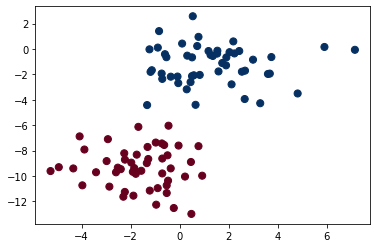

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

We can create a simple model by assuming that the data is described by a Gaussian distribution with no covariance between dimensions. Consequently, this model can be fit by simply finding the mean and standard deviation of the points within each label: this is all it takes to define such a distribution. In case we need to ensure that our assumptions hold, i.e., the likelihood distributions are normal and independent, we may follow the approach suggested by [William Zhu](https://www.kaggle.com/blackblitz/gaussian-naive-bayes).


The result of such a naive Gaussian assumption is shown in the below  figure:

Text(0.5, 1.0, 'Naive Bayes Model')

[(-15.0, 5.0), (-8.0, 8.0)]

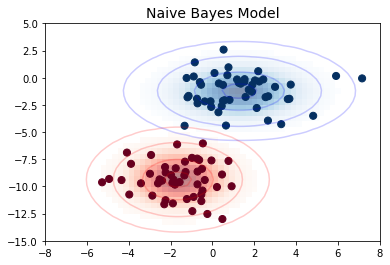

In [5]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

Above ellipses represent the Gaussian generative model for each label, with larger probability concentrated toward the center of the ellipses. Such a [generative model](https://en.wikipedia.org/wiki/Generative_model) for each class provides us with the ability to compute the likelihood $P(Features \mid  Class Label)$ for any data point; as a result we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure has been implemented in Scikit-Learn's sklearn.naive_bayes.GaussianNB estimator:

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

We can generate some new data and predict the label:

In [7]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

It is also possible to plot this new data to get a better understanding of where the decision boundary is:

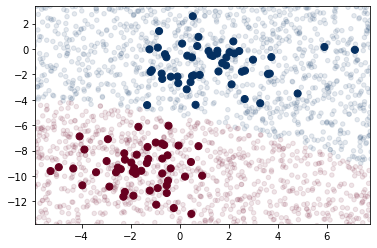

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We can see a slightly curved boundary in the classifications; note that in general, the boundary in Gaussian naive Bayes is quadratic.

An important charactersitic of this Bayesian formalism is that it naturally allows for probabilistic classification, which can be computed by using the predict_proba method:

In [9]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The columns provide us with the posterior probabilities of the first and second label, respectively. Bayesian approaches like this can be a useful approach in providing estimates of uncertainty in the classification.

The quality of the final classification will only be as good as the model assumptions that lead to it; this is why Gaussian naive Bayes may not sometimes produce very good results. As mentioned in Section 1 as the number of features becomes larger, the assumptions underlying the navie Bayes classifier are not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes 

[MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) implements the naive Bayes algorithm for multinomially distributed data; it is one of the two classic naive Bayes variants used in text classification, where the data are usually repesented as word vector counts; however, it should be noted that [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) vectors are also known to work well in practice. 

The distribution is parametrized through vectors $\theta_y = (\theta_{y1},\ldots,\theta_{yn})$ for each class $y$, where $n$ indicates the number of features (in text classification, it refers to the size of the vocabulary) and $\theta_{yi}$ represents the probability $P(x_i \mid y)$ of feature $i$ appearing in a sample which belongs to class $y$.

The parameter $\theta_y$ is estimated by utilizng a smoothed version of maximum likelihood, i.e., relative frequency counting:

$$\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$$

 
In the above, $N_{yi} = \sum_{x \in T} x_i$ represents the number of times feature $i$ appears in a sample of class $y$  in the training set $T$, and $N_{y} = \sum_{i=1}^{n} N_{yi}$ indicates the total count of all features for class $y$.

The smoothing priors $\alpha \ge 0$ accounts for features which are not present in the learning samples and moreover, prevents zero probabilities in further computations. Setting $\alpha = 1$ is referred to as [Laplace smoothing]((https://en.wikipedia.org/wiki/Additive_smoothing)), while $\alpha < 1$ is called Lidstone smoothing. 

As the multinomial distribution describes the probability of observing counts among a number of categories, multinomial naive Bayes seems most appropriate for features that represent counts or count rates.

Let us look at an [example](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html):

Multinomial naive Bayes is generally used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. In this example, we will use the sparse word count features from the 20 Newsgroups corpus to illustrate how we might classify these short documents into categories.

Let's start by downloading the data and taking a look at the target names:

In [10]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

To keep things simple, we select just a few of these categories, and download the training and testing set:

In [11]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Let's look at a representative entry from the data:

In [12]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



To be able to use this data for machine learning, we must convert the content of each string into a vector of numbers. Here, we will use the TF-IDF vectorizer and create a pipeline that attaches it to a multinomial naive Bayes classifier as follows:

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With the pipeline in place, we are ready to apply the model to the training data, and predict labels for the test data:

In [14]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

After predicting the labels for the test data, we can evaluate them to learn more about the performance of the estimator. For instance, below is the confusion matrix between the true and predicted labels for the test data:

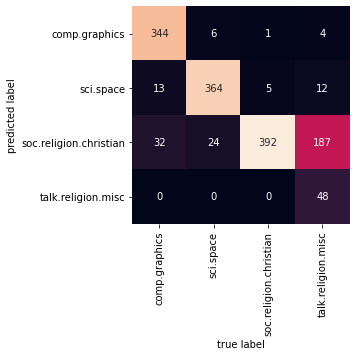

In [15]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

As can be seen, even such a very simple classifier is able to successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. 

The interesting point here is that we now have the tools to determine the category for any string, using the predict() method of this pipeline. Next is a quick utility function that will return the prediction for a single string:

In [16]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try our model:

In [17]:
predict_category('sending a payload to the ISS')

'sci.space'

In [18]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [19]:
predict_category('determining the screen resolution')

'comp.graphics'

Note that this is not more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is prominent. This shows that even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can surprisingly achieve good results.

## Bernoulli Naive Bayes

[BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB) implements the naive Bayes training as well as classification algorithms for data that is distributed according to multivariate Bernoulli distributions, that is, there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. As a result, this class requires samples to be represented as binary-valued feature vectors. In case a BernoulliNB instance is presented any other kind of data, it may binarize its input (depending on the binarize parameter).

The decision rule for Bernoulli naive Bayes is based on the following:

$$P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)$$

This is diffent from multinomial NB's rule in that it explicitly penalizes the non-occurrence of a feature  that is an indicator for class, in contrast to the multinomial variant which would simply ignore a non-occurring feature.

In applcations of text classification, word occurrence vectors (instead of word count vectors) may be used to train and use this classifier. BernoulliNB may possibly perform better on some datasets, especially those with shorter documents. Typically, advisable to evaluate both models, in cases resources allow for that.

Let us look at an [example](https://scikit-learn.org/stable/auto_examples/ensemble/plot_random_forest_embedding.html#sphx-glr-auto-examples-ensemble-plot-random-forest-embedding-py). 

[RandomTreesEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomTreesEmbedding.html) provides us with a way to map data to a very high-dimensional and sparse representation, which might be useful for classification. This mapping is completely unsupervised and tends to be very efficient.

This example visualizes the partitions given by several trees and illustrates how the transformation can also be used for non-linear dimensionality reduction or non-linear classification. Points which are neighboring typically share the same leaf of a tree and as a result, share large parts of their hashed representation. This facilitates separating two concentric circles simply based on the principal components of the transformed data with truncated SVD.

In high-dimensional spaces, linear classifiers are typically able to achieve excellent accuracy. When it comes to sparse binary data, BernoulliNB is particularly well-suited. The bottom row provides a comparison between the decision boundary obtained by BernoulliNB in the transformed space with an ExtraTreesClassifier forests that is learned on the original data.

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=3, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

Text(0.5, 1.0, 'Original Data (2d)')

[]

[]

Text(0.5, 1.0, 'Truncated SVD reduction (2d) of transformed data (74d)')

[]

[]

Text(0.5, 1.0, 'Naive Bayes on Transformed data')

(-1.4, 1.4)

(-1.4, 1.4)

[]

[]

Text(0.5, 1.0, 'ExtraTrees predictions')

(-1.4, 1.4)

(-1.4, 1.4)

[]

[]

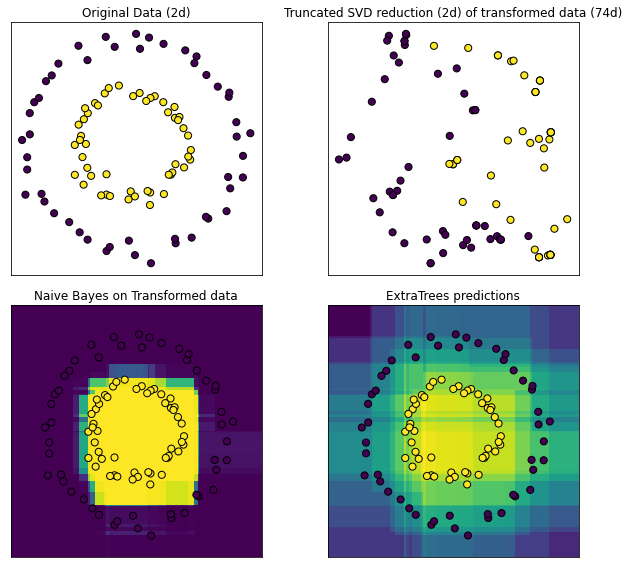

In [22]:
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB

# make a synthetic dataset
X, y = make_circles(factor=0.5, random_state=0, noise=0.05)

# use RandomTreesEmbedding to transform data
hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
X_transformed = hasher.fit_transform(X)

# Visualize result after dimensionality reduction using truncated SVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)

# Learn a Naive Bayes classifier on the transformed data
nb = BernoulliNB()
nb.fit(X_transformed, y)


# Learn an ExtraTreesClassifier for comparison
trees = ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)
trees.fit(X, y)


# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50, edgecolor='k')
ax.set_title("Truncated SVD reduction (2d) of transformed data (%dd)" %
             X_transformed.shape[1])
ax.set_xticks(())
ax.set_yticks(())

# Plot the decision in original space. For that, we will assign a color
# to each point in the mesh [x_min, x_max]x[y_min, y_max].
h = .01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# transform grid using RandomTreesEmbedding
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

# transform grid using ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

plt.tight_layout()
plt.show()

# 5 Further Reading 

+   Max Kuhn and Kjell Johnson, Applied Predictive Modeling, Springer-Verlag New York Inc., 2018
+   Jason Brownlee, [Better Naive Bayes: 12 Tips To Get The Most From The Naive Bayes Algorithm](https://machinelearningmastery.com/better-naive-bayes/)




# 6 References

+ Stuart Russel and Peter Norvig, Artificial Intelligence: A Modern Approach (3rd Edition), Pearson, 2009
+ Jake VanderPlas, Python Data Science Handbook, O'Reilly Media, Inc, USA, 2016 
+ Naive Bayes Classifier available online at [GeeksforGeeks](https://www.geeksforgeeks.org/naive-bayes-classifiers/)    